<a href="https://colab.research.google.com/github/anastasiya-h79/data_analysis_apartments_sale_research/blob/main/apartment_sale_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Исследовательский анализ данных. Исследование объявлений о продаже апартаментов.*

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


Описание данных

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах(м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данных встречаются два типа числовых данных, что может создать проблемы во время исследования.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Дата и время в столбце first_day_exposition находится не в нужном формате, т.е. весомые данные в этом столбце это дата, а не время.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, два типа числовых значений. Так же следует изменить формат даты в столбце first_day_exposition.



# Предобработка данных

In [4]:
df.duplicated().sum() # Дубликатов нет

0

In [5]:
display(df.isna().sum()) # посчитаем пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int') # заменим пропуски в 'days_exposition'

In [7]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [8]:
# приведем к нижнему регистру
print('Количество уникальных названий городов -',
      len(df['locality_name'].unique()))
df['locality_name'] = df['locality_name'].str.lower()

print('Количество уникальных названий городов, приведённых к нижнему регистру -',
      len(df['locality_name'].unique()))

Количество уникальных названий городов - 365
Количество уникальных названий городов, приведённых к нижнему регистру - 365


In [9]:
# заменим ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
len(df['locality_name'].unique())

331

In [10]:
# пропуски в 'locality_name'
df['locality_name'].isna().sum()

49

In [11]:
# пропусков мало, можно удалить
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

In [12]:
# приведем 'first_day_exposition' к формату год-месяц-день
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") 

Пропущенные значения в столбце balcony скорее всего означает, что балконов нет. Заменим пропуски нулями, столбец balcony приведём к целочисленному формату.

In [13]:
df['balcony'] = df['balcony'].fillna(0)

Столбцы is_apartment, studio, open_plan.

Пропущенные значения, скорее всего, означают, что квартира не походит под этот тип. Заменим пропуски нулями



In [14]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['open_plan'] = df['open_plan'].fillna(0)
df['studio'] = df['studio'].fillna(0)

In [15]:
# Сократим цену до миллионов, оставив 3 знака после запятой 
df['last_price'] = df['last_price'] / 1000000 
df['last_price'] = df['last_price'].round(3)

In [16]:
# Пропуски в 'ceiling_height' заполним медианными значениями
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [17]:
# Заполним пропуски в 'living_area'. Сначала найдём коэффициент соотношения общей площади к живой 
# Затем найдём жилую площадь, поделив общую площадь на найденный коэффициент
k_area = df[df['living_area'].isnull() == False]['total_area'].mean() / df[df['living_area'].isnull()== False]['living_area'].mean()
df['living_area'] = df['living_area'].fillna(df['total_area']/k_area)

Остальные столбцы с пропусками оставим, не заполняя. Их заполнение может создать помехи в данных

In [18]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.176001,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121


Добавим в таблицу данные, которые пригодятся для EDA

In [19]:
# цена кв.м
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

In [20]:
# день недели, месяц, год публикации
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [21]:
# этаж квартиры - 1й, последний, другой
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floor_name'] = df.apply(floor, axis=1)

In [22]:
# соотношение жилой к общей площади, отношение площади кухни к общей, стоимость кв. м
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df['price_per_square_meter'] = df['last_price'] / df['total_area']

In [23]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day,month,year,floor_name,living_area_ratio,kitchen_area_ratio
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,0.082921,1,12,2018,первый,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.092786,3,8,2015,другой,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,2.65,14.0,91.176001,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.408176,4,7,2015,другой,0.573434,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.100000,1,6,2018,другой,0.320000,0.410000


# **EDA**

## Задача 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [24]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,23650.000000,23650.000000,23650.000000
mean,60.329069,6.541127,2.070106,2.724311
std,35.661808,10.896399,1.078620,0.989255
min,12.000000,0.012000,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.600000
50%,52.000000,4.650000,2.000000,2.650000
75%,69.700000,6.799000,3.000000,2.700000
max,900.000000,763.000000,19.000000,100.000000


Проанализируем выбросы

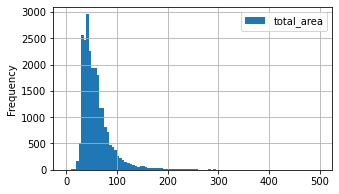

In [25]:

df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))

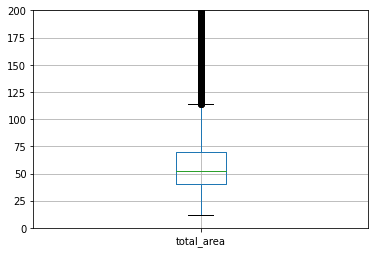

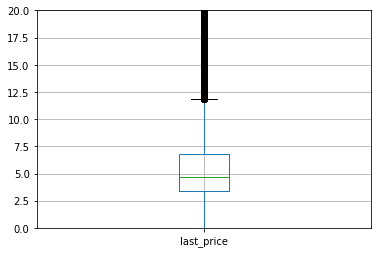

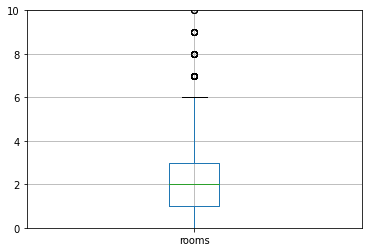

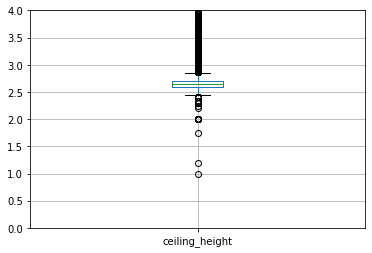

In [26]:
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylim_list = [200, 20, 10, 4]
for n in range(4):
    df.boxplot(column=column_list[n]).set_ylim(0,ylim_list[n])
    plt.show()

Определим границы до выбросов:

total_area: 20 - 120 кв. м.;
last_price: 0 - 12 млн руб.;
rooms: 0-6;
celling_height: 2,2 - 3,2 м.

In [27]:
# отфильтруем данные от выбросов
data_filtered = df.query(
    'last_price < 12 and ceiling_height < 3.2 and ceiling_height > 2.2 and total_area >= 20 and total_area <= 120 and rooms < 6')

print('Процент строк, от которых избавились: {:.2%}'.format(1 - len(data_filtered['last_price']) / len(df['last_price'])))

Процент строк, от которых избавились: 11.75%


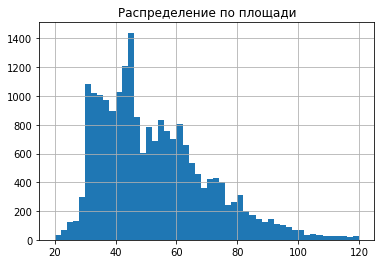

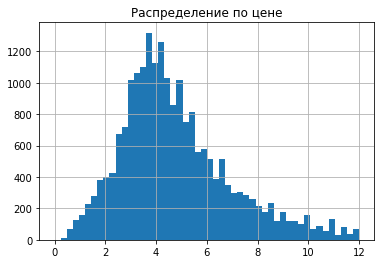

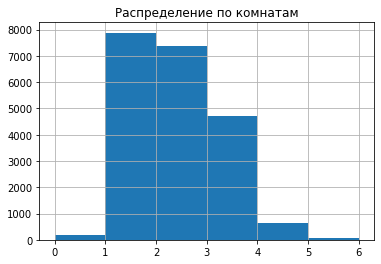

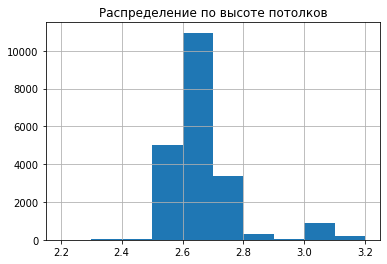

In [28]:
# гистограмма для каждого из изменившихся параметров
data_filtered['total_area'].hist(bins=50, range=(20, 120))
plt.title('Распределение по площади')
plt.show()

data_filtered['last_price'].hist(bins=50, range=(0, 12))
plt.title('Распределение по цене')
plt.show()

data_filtered['rooms'].hist(bins=6, range=(0, 6))
plt.title('Распределение по комнатам')
plt.show()

data_filtered['ceiling_height'].hist(bins=10, range=(2.2, 3.2))
plt.title('Распределение по высоте потолков')
plt.show()

Выводы по задаче 1: 

Наибольшая часть квартир имеет плозадь от 30 до 80 кв. м

Большая часть квартир продаётся от 2 до 8 млн руб.

Больше всего квартир имеют 1, 2 или 3 комнаты, но встречаются квартиры и с бОльшим количеством комнат

НаибОльшее число квартир имеют потолки от 2.5 м до 2.8 м

## Задача 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [29]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,23650.000000
mean,156.448964
std,213.564548
min,0.000000
25%,22.000000
50%,73.000000
75%,198.000000
max,1580.000000


In [30]:
df['days_exposition'].median()

73.0

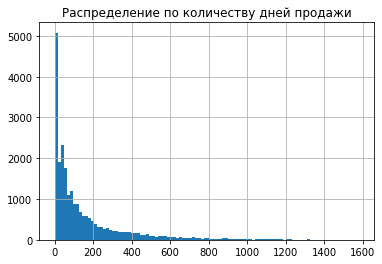

In [31]:
df['days_exposition'].hist(bins=100)
plt.title('Распределение по количеству дней продажи')
plt.show()

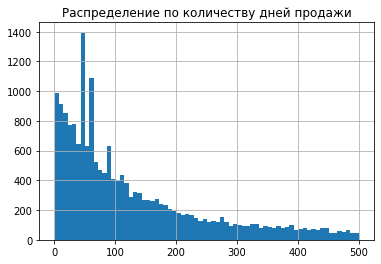

In [32]:
df['days_exposition'].hist(bins=70, range=(1, 500))
plt.title('Распределение по количеству дней продажи')
plt.show()

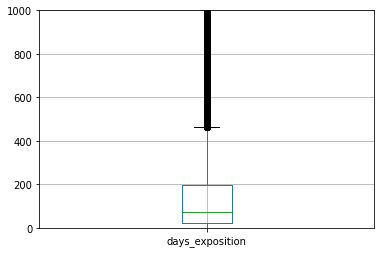

In [33]:
df.boxplot(column='days_exposition').set_ylim(0, 1000)
plt.show()

Большая часть квартир продается за первые 100 дней с момента публикации объявления. Быстрой продажей можно считать, если квартира продалась в течении 50 дней после публикации объявления. Медленной продажей можно считать, если квартира продается более 200 дней

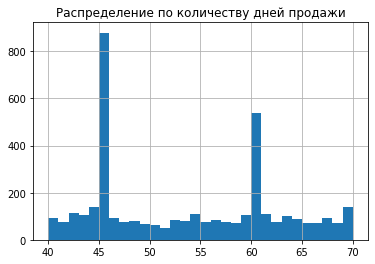

In [34]:
# пики продаж на 45й и 60й день. Вероятно, эти квартиры автоматичски снимались с продажи
df['days_exposition'].hist(bins=30, range=(40, 70))
plt.title('Распределение по количеству дней продажи')
plt.show()

## Задача 3. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

0.30220181209172897

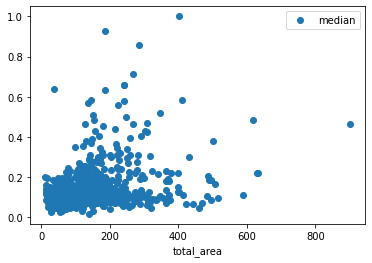

In [35]:
# зависимость цены от площади квартиры

pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

df['total_area'].corr(df['price_per_square_meter'])
#pivot_table_total_area.head()

Кореляция есть, но слабая. C увеличением площади кв. рост цены за кв.м не велик

,mean,count,median
floor_name,,,
другой,0.103508,17408,0.098305
первый,0.081989,2912,0.081237
последний,0.093379,3330,0.087763


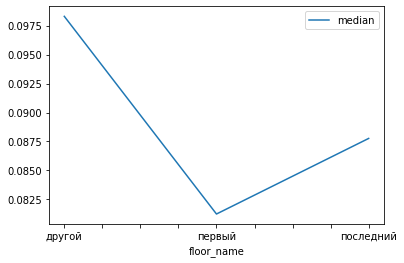

In [36]:
# зависимость цены за кв. м от этажа 

pivot_table_floor_name = df.pivot_table(
        index = 'floor_name', 
        values = 'price_per_square_meter', 
        aggfunc = ['mean', 'count', 'median'])

pivot_table_floor_name.columns = ['mean', 'count', 'median']
pivot_table_floor_name.plot(y = 'median')
pivot_table_floor_name

Самые дешёвые квртиры на 1м этаже, дороже - на последнем и самые дорогие на других этажах

0.05547063298471476

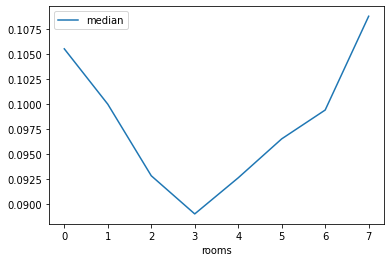

In [37]:
# зависимость цены за кв. м от числа комнат

pivot_table_rooms = df.pivot_table(
    index = 'rooms', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

df['rooms'].corr(df['price_per_square_meter'])

Коэффициент корреляции умеренный. Зависимость между числом комнат и ценой за кв.м есть. Но можно сделать вывод, что цена за кв. м дешевле всего у 3-комн. квартир

-0.31809933802323276

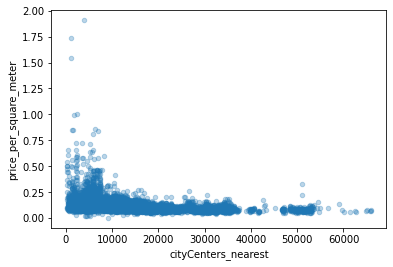

In [38]:
#  зависимость цены за кв. м от удалённости от центра

df.plot(
    kind = 'scatter', 
    y = 'price_per_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.3)

df['cityCenters_nearest'].corr(df['price_per_square_meter'])

На графике виден рост цены за кв. м в зависимости от приближённости квартиры к центру города. Но после 20 км эта зависимость пропадает, цены за кв. м примерно одинаковы, а после 35 км начинают снижаться.

,mean,count,median
day,,,
1,0.099725,4175,0.095634
2,0.099606,3966,0.095474
3,0.100193,4286,0.095153
0,0.099470,3606,0.094704
4,0.098987,3992,0.094608
6,0.097763,1692,0.094595
5,0.099066,1933,0.093548


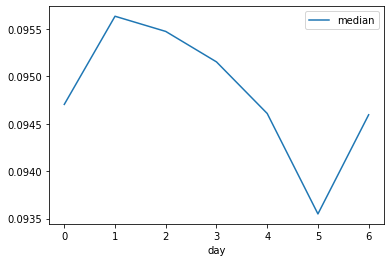

In [39]:
# зависимость цены за кв. м от дня недели

pivot_table_day_exposition = df.pivot_table(
    index = 'day', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_day_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_exposition.plot(y = 'median')

pivot_table_day_exposition.sort_values('median', ascending = False)

Выставленные во вторник квариры самые дорогие, а в субботу - самые дешёвые. Предполагаю, что цена зависит от активности людей в рабочие и выходные дни

,mean,count,median
month,,,
4,0.101957,2373,0.096452
8,0.100147,1742,0.096103
11,0.099254,2367,0.095625
9,0.100491,1979,0.095609
3,0.098998,2582,0.095293
1,0.099838,1491,0.095210
7,0.099651,1690,0.095019
2,0.098770,2639,0.095000
12,0.099502,1638,0.094238


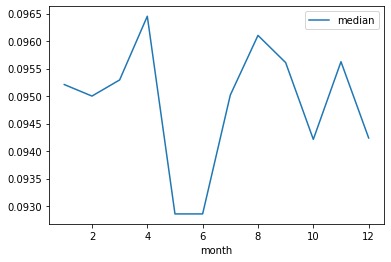

In [40]:
# зависимость цены за кв. м от месяца

pivot_table_month_exposition = df.pivot_table(
    index = 'month', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Cамая высокая цена за кв. м в апреле и августе. Самая низкая - в мае и июне. На цену может влиять сезон отпусков, сезонное летнее затишье и осеннее насыщение рынка недвижимости 

,mean,count,median
year,,,
2014,0.124302,136,0.106902
2019,0.107124,2879,0.103306
2018,0.097800,8512,0.095704
2015,0.104719,1173,0.093396
2017,0.097637,8185,0.092570
2016,0.098295,2765,0.091667


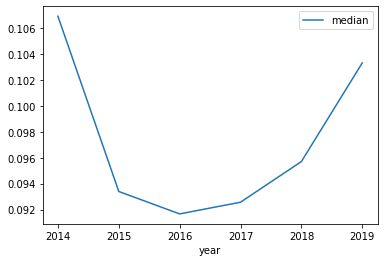

In [41]:
# зависимость цены за кв. м от года

pivot_table_year_exposition = df.pivot_table(
    index = 'year', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

Наблюдаем резкий спад после 2014г. и затем подъем к 2018 и 2019 г.г.Возможно, это связано с кризисом 2014г. Или медианное значение не дает нам корректного представления, и по факту, цены аналогичных квартир могли вести себя по-другому

## Задача 4. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [42]:
locality_pivot_table = df.pivot_table(
    index = 'locality_name', 
    values = 'price_per_square_meter', 
    aggfunc=['count', 'mean'])

locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)


In [43]:
# самая высокая цена
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
санкт-петербург,15721,0.114849


In [44]:
# самая низкая цена
locality_pivot_table[locality_pivot_table['mean'] == locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
выборг,237,0.058142


## Задача 5. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [ ]:
# добавим столбец с растоянием от центра в км, заполним пропуски и приведём формат к целочисленному

df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')


,price_per_square_meter
cityCenters_nearest_km,
0,0.187324
1,0.166604
2,0.146663
3,0.129416
4,0.137475
5,0.146979
6,0.152278
7,0.141400
8,0.120581


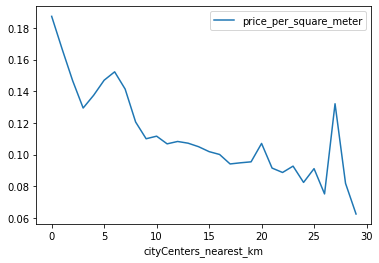

In [46]:
pivot_table_km = df.query(
    'locality_name == "санкт-петербург" and cityCenters_nearest_km !=999999'
    ).pivot_table(
        index = 'cityCenters_nearest_km', 
        values = 'price_per_square_meter', 
        aggfunc = 'mean')

pivot_table_km.plot()
pivot_table_km

Судя по ценам на кв. м, центром можно считать радиус в 10 км

## Задача 6. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [48]:
# выделим квартиры в радиусе 10 км от центра

center_spb = df.query("cityCenters_nearest_km <= 10 and locality_name == 'санкт-петербург'")

0.04942212503929211

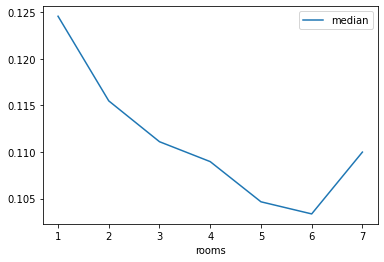

In [49]:
# зависимость цены за кв. м от количества комнат

center_spb_rooms = center_spb.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb['rooms'].corr(center_spb['price_per_square_meter'])

Коэффициент корреляции слабый. Связь между количеством комнат и ценой за кв. м в центре Питера почти не ощутима

,mean,count,median
floor_name,,,
другой,0.135173,4403,0.119550
первый,0.113676,650,0.101875
последний,0.134789,931,0.112080


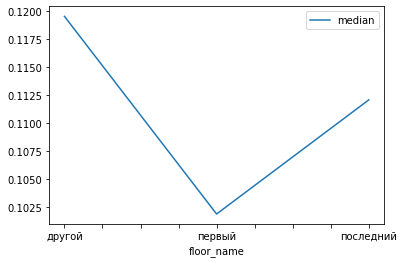

In [50]:
# зависимость цены за кв. м от этажа

center_spb_floor = center_spb.pivot_table(
    index = 'floor_name', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_floor.columns = ['mean', 'count', 'median']
center_spb_floor.plot(y = 'median')
center_spb_floor

Зависимость цены за кв. м в общей выборке и выборке квартир в центре нет

-0.18592887483224152

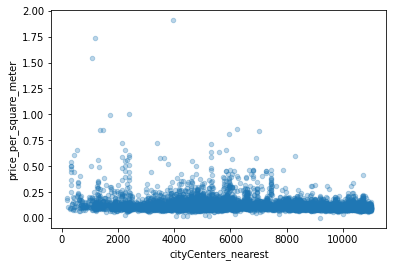

In [51]:
# зависимость цены за кв. м от удалённости от центра

center_spb.plot(
    kind = 'scatter', 
    y = 'price_per_square_meter', 
    x = 'cityCenters_nearest', 
    alpha = 0.3)

center_spb['cityCenters_nearest'].corr(center_spb['price_per_square_meter'])

Зависимости нет, чего и следовало ожидать

,mean,count,median
day,,,
6,0.132134,383,0.120000
5,0.139216,454,0.118122
0,0.133366,901,0.116981
2,0.132217,1014,0.115470
3,0.133265,1157,0.115264
4,0.131232,1004,0.115054
1,0.131241,1071,0.114130


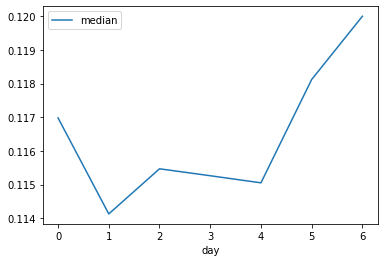

In [52]:
# зависимость цены за кв. м от дня недели размещения объявления

center_spb_day_exposition = center_spb.pivot_table(
    index = 'day', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_day_exposition.columns = ['mean', 'count', 'median']
center_spb_day_exposition.plot(y = 'median')

center_spb_day_exposition.sort_values('median', ascending = False)

,mean,count,median
month,,,
3,0.133639,651,0.120290
1,0.135757,370,0.119393
8,0.134112,432,0.119299
9,0.133721,510,0.118847
11,0.131643,562,0.116308
4,0.138013,591,0.115646
10,0.129461,510,0.114947
7,0.131672,466,0.114587
12,0.135169,396,0.114349


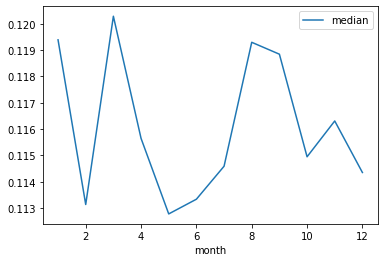

In [53]:
# зависимость цены за кв. м от месяца размещения объявления

center_spb_month_exposition = center_spb.pivot_table(
    index = 'month', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

Самые низкие цены за метр в феврале и мае, а самые высокие цены в марте и январе

,mean,count,median
year,,,
2014,0.159559,56,0.137228
2019,0.142536,691,0.125000
2018,0.130020,1936,0.116704
2015,0.136009,448,0.113879
2017,0.130993,2061,0.113230
2016,0.131933,792,0.112171


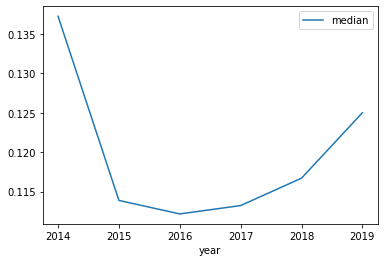

In [54]:
# зависимость цены за кв. м от года размещения объявления

center_spb_year_exposition = center_spb.pivot_table(
    index = 'year', 
    values = 'price_per_square_meter', 
    aggfunc = ['mean', 'count', 'median'])

center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

Цена за кв. м падала до 2016г., затем начала расти. Этот график похож на график общей выборки

#**Общий вывод**

Согласно проведенному исследованию, большое количество объявлений было автоматически снято с сервиса Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры. Нормальные значения продажи квартир варьируются от 1 до 500 дней. На цену за кв. м более всего влияют количество комнат, этаж и близость к центру. При продаже/покупке квартир нужно учитывать сезонность. Общая площадь квартиры, день размещения объявления незначительно влияют на стоимость кв. м. Нужно учитывать, что после 2014 г. и до 2016 г. стоимость квартир в среднем по рынку была низкой, затем снова выросла. 

Важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели в целом. Возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-другому.